In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd 
import numpy as np 
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

os.chdir("/content/drive/MyDrive/HAM10000")
!ls

HAM10000_images_part_1	HAM10000_segmentations_lesion_tschandl
HAM10000_images_part_2	training_data.csv
HAM10000_metadata.csv	training_data.npy


In [ ]:
#get metadata
mdata = pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv")
mdata


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [ ]:
from pyparsing.helpers import identbodychars
class DermClass(): 
  #make images 50 x 50 to start 
  mdata = pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv")
  IMG_SIZE = 400
  labels = {}
  img_map = {}
  #training data 
  training_data = []
  # track balance 
  balance = {}
  #relavent directories 
  sds = ["/HAM10000_images_part_1/", "/HAM10000_images_part_2/"]
  root = "/content/drive/MyDrive/HAM10000"

  def __init__(self):
    #assign labels
    self.make_labels()
    #make the map
    self.make_image_map()
    print(self.labels, self.img_map)
  """ Assign numbers to the diagnosis types"""
  def make_labels(self):
    i = 0 
    for d in self.mdata["dx"].unique():
      self.labels[d] = i 
      i += 1
  """ Assign to each image the corresponding label """
  def make_image_map(self):
    for im, dx in zip(list(self.mdata["image_id"]), list(self.mdata["dx"])):
      self.img_map[im] = self.labels[dx]

  def make_training_data(self):
    for sd in self.sds:
      for f in tqdm(os.listdir(self.root+sd)):
        # extract the image id from the file path
        id = f.split(".")[0].strip(" ").split(" ")[0]
        try: 
          path = os.path.join(self.root+sd, f)
          # print(path)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([ np.array(img), np.eye(len(self.labels))[self.img_map[id]] ]) 
          #check balance here 
          if self.img_map[id] not in self.balance:
            self.balance[self.img_map[id]] = 0
          self.balance[self.img_map[id]] += 1
        #handle exception 
        except Exception as e:
            pass 
    # np.random.shuffle(self.training_data)
    # np.save("training_data.npy", self.training_data)
    print(self.balance)

In [ ]:
dc = DermClass()
dc.make_training_data()

{'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6} {'ISIC_0027419': 0, 'ISIC_0025030': 0, 'ISIC_0026769': 0, 'ISIC_0025661': 0, 'ISIC_0031633': 0, 'ISIC_0027850': 0, 'ISIC_0029176': 0, 'ISIC_0029068': 0, 'ISIC_0025837': 0, 'ISIC_0025209': 0, 'ISIC_0025276': 0, 'ISIC_0029396': 0, 'ISIC_0025984': 0, 'ISIC_0025767': 0, 'ISIC_0032417': 0, 'ISIC_0031326': 0, 'ISIC_0025915': 0, 'ISIC_0031029': 0, 'ISIC_0029836': 0, 'ISIC_0032129': 0, 'ISIC_0032343': 0, 'ISIC_0025033': 0, 'ISIC_0027310': 0, 'ISIC_0032128': 0, 'ISIC_0025937': 0, 'ISIC_0027828': 0, 'ISIC_0029291': 0, 'ISIC_0030698': 0, 'ISIC_0025567': 0, 'ISIC_0031753': 0, 'ISIC_0026835': 0, 'ISIC_0031159': 0, 'ISIC_0031017': 0, 'ISIC_0024981': 0, 'ISIC_0027815': 0, 'ISIC_0024324': 0, 'ISIC_0029559': 0, 'ISIC_0030661': 0, 'ISIC_0027053': 0, 'ISIC_0028560': 0, 'ISIC_0031650': 0, 'ISIC_0029161': 0, 'ISIC_0026273': 0, 'ISIC_0025076': 0, 'ISIC_0029687': 0, 'ISIC_0025642': 0, 'ISIC_0025819': 0, 'ISIC_0032013': 0, 'ISIC_0031691':

100%|██████████| 5111/5111 [00:57<00:00, 88.30it/s] 

{1: 6806, 5: 522, 3: 1133, 0: 1111, 6: 331, 2: 115, 4: 144}


In [ ]:
training_data = dc.training_data


In [ ]:
np.random.shuffle(training_data)

In [ ]:
len(training_data)

10162

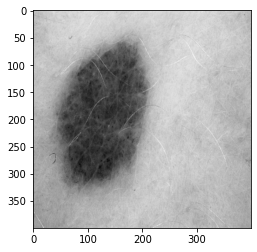

In [ ]:
plt.imshow(training_data[18][0], cmap="gray")

In [ ]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #input 1, 32 convolutional features, 5x5 window 
        #unclear what this means 
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.b1 = nn.BatchNorm2d(32)
        #adding batch norm 
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.b2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.b3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 5)
        self.b4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, 5)
        self.b5 = nn.BatchNorm2d(512)
        #we have to figure out the size of the flattened input to the linear layer which is currently unknown
        x = torch.randn(400,400).view(-1,1,400,400)
        self._to_linear = None
        self.convs(x)
        # 4 linear layers 
        self.fc1 = nn.Linear(self._to_linear, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 7)
        #7 output layers

    def convs(self,x):
        #c1
        x = self.b1(F.max_pool2d(F.relu(self.conv1(x)), (2,2)))
        #c2
        x = self.b2(F.max_pool2d(F.relu(self.conv2(x)), (2,2)))
        #c3
        x = self.b3(F.max_pool2d(F.relu(self.conv3(x)), (2,2)))
        #c4
        x = self.b4(F.max_pool2d(F.relu(self.conv4(x)), (2,2)))
        #c5 
        x = self.b5(F.max_pool2d(F.relu(self.conv5(x)), (2,2)))
        #determine the final shape
        # print(x[0].shape)
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]* x[0].shape[1] * x[0].shape[2]
        return F.softmax(x, dim=1) 

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x 

#putting the model on graphics card 
# import torch_xla
# import torch_xla.core.xla_model as xm
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using Device: ", device)
model = Net()
model = model.to(device)


Using Device:  cuda:0


In [ ]:
import torch.optim as optim 

optimizer = optim.Adam(model.parameters(), lr=.001)
loss_function = nn.MSELoss()

X = torch.tensor([i[0] for i in training_data]).view(-1, 400, 400)
#scale image values to between 0-1
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = .25
val_size = int(len(X)*VAL_PCT)
print(val_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


2540


In [ ]:
len(training_data)

10162

In [ ]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]
print(len(train_X), len(test_X))

7622 2540


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            #create the batches here as usual 
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 400, 400)
            batch_y = train_y[i:i+BATCH_SIZE]
            # put them onto the gpu 
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            net.zero_grad()
            optimizer.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update
        print(f"Epoch: {epoch}. Loss: {loss}")



train(model)

100%|██████████| 239/239 [00:42<00:00,  5.57it/s]


Epoch: 0. Loss: 0.07651376724243164


100%|██████████| 239/239 [00:35<00:00,  6.75it/s]


Epoch: 1. Loss: 0.0712750256061554


100%|██████████| 239/239 [00:35<00:00,  6.76it/s]


Epoch: 2. Loss: 0.05937805771827698


100%|██████████| 239/239 [00:35<00:00,  6.76it/s]


Epoch: 3. Loss: 0.0508565679192543


100%|██████████| 239/239 [00:35<00:00,  6.76it/s]


Epoch: 4. Loss: 0.04544559493660927


100%|██████████| 239/239 [00:35<00:00,  6.75it/s]


Epoch: 5. Loss: 0.03656290844082832


100%|██████████| 239/239 [00:35<00:00,  6.76it/s]


Epoch: 6. Loss: 0.023466475307941437


100%|██████████| 239/239 [00:35<00:00,  6.76it/s]


Epoch: 7. Loss: 0.04433342441916466


100%|██████████| 239/239 [00:35<00:00,  6.75it/s]


Epoch: 8. Loss: 0.009733052924275398


100%|██████████| 239/239 [00:35<00:00,  6.76it/s]

Epoch: 9. Loss: 0.0013271219795569777


In [ ]:
def test():
    correct = 0
    total = 0
    class_correct = {}
    class_samples = {}
    for i in tqdm(range(0, len(test_X), BATCH_SIZE)):

        batch_X = test_X[i:i+BATCH_SIZE].view(-1, 1, 400, 400).to(device)
        batch_y = test_y[i:i+BATCH_SIZE].to(device)
        batch_out = model(batch_X)

        out_maxes = [torch.argmax(i) for i in batch_out]
        target_maxes = [torch.argmax(i) for i in batch_y]
        for i,j in zip(out_maxes, target_maxes):
            if j.item() not in class_samples:
              class_samples[j.item()] = 0
            class_samples[j.item()] += 1
            if j.item() not in class_correct:
              class_correct[j.item()] = 0
            if i == j:
                correct += 1
                class_correct[j.item()] += 1
            total += 1
    #general acc 
    acc = 100.0 * correct/total
    print(f'Accuracy of the network: {acc} %')
    #specific acc
    for c in class_correct:
      class_correct[c] /= class_samples[c]
    class_correct = dict(sorted(class_correct.items(), key=lambda item: item))
    print("Breakdown: ", class_correct)


In [ ]:
test()

100%|██████████| 80/80 [00:03<00:00, 20.47it/s]

Accuracy of the network: 72.24409448818898 %
Breakdown:  {0: 0.33448275862068966, 1: 0.9020857473928158, 2: 0.04, 3: 0.33070866141732286, 4: 0.07317073170731707, 5: 0.4406779661016949, 6: 0.47674418604651164}
